In [13]:
from TO_sim.Utility import *
from TO_sim.To_Draw import *
from TO_sim.for_Multi import shuffle_seed_Hysteresis_pd as SFHy 
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_perturbation as KP #Kuramoto_perturbation
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_without_aram as HY #Kuramoto_perturbation

import numpy as np
import matplotlib.pyplot as plt
import parmap
# DF = 'Review/22.11.16/with out perturbation/'
DF = 'Review/22.11.16/with perturbation/'
Create_Folder(DF)

In [19]:
N = 500
dist = 'Lorentzian'
t_end = 200
ss = 8
N = 500
dK = 0.01
dt = 0.1
m = 6
save = True

In [20]:
DF = f'Review/22.11.16/with perturbation/{dist}/dK ={dK}/'
Create_Folder(DF)

In [18]:
dist

'Quantile Lorentzian'

  0%|          | 0/1241 [00:00<?, ?it/s]

  0%|          | 0/1241 [00:00<?, ?it/s]

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:24: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


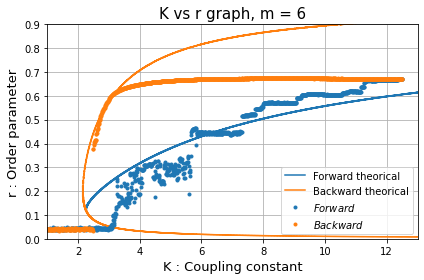

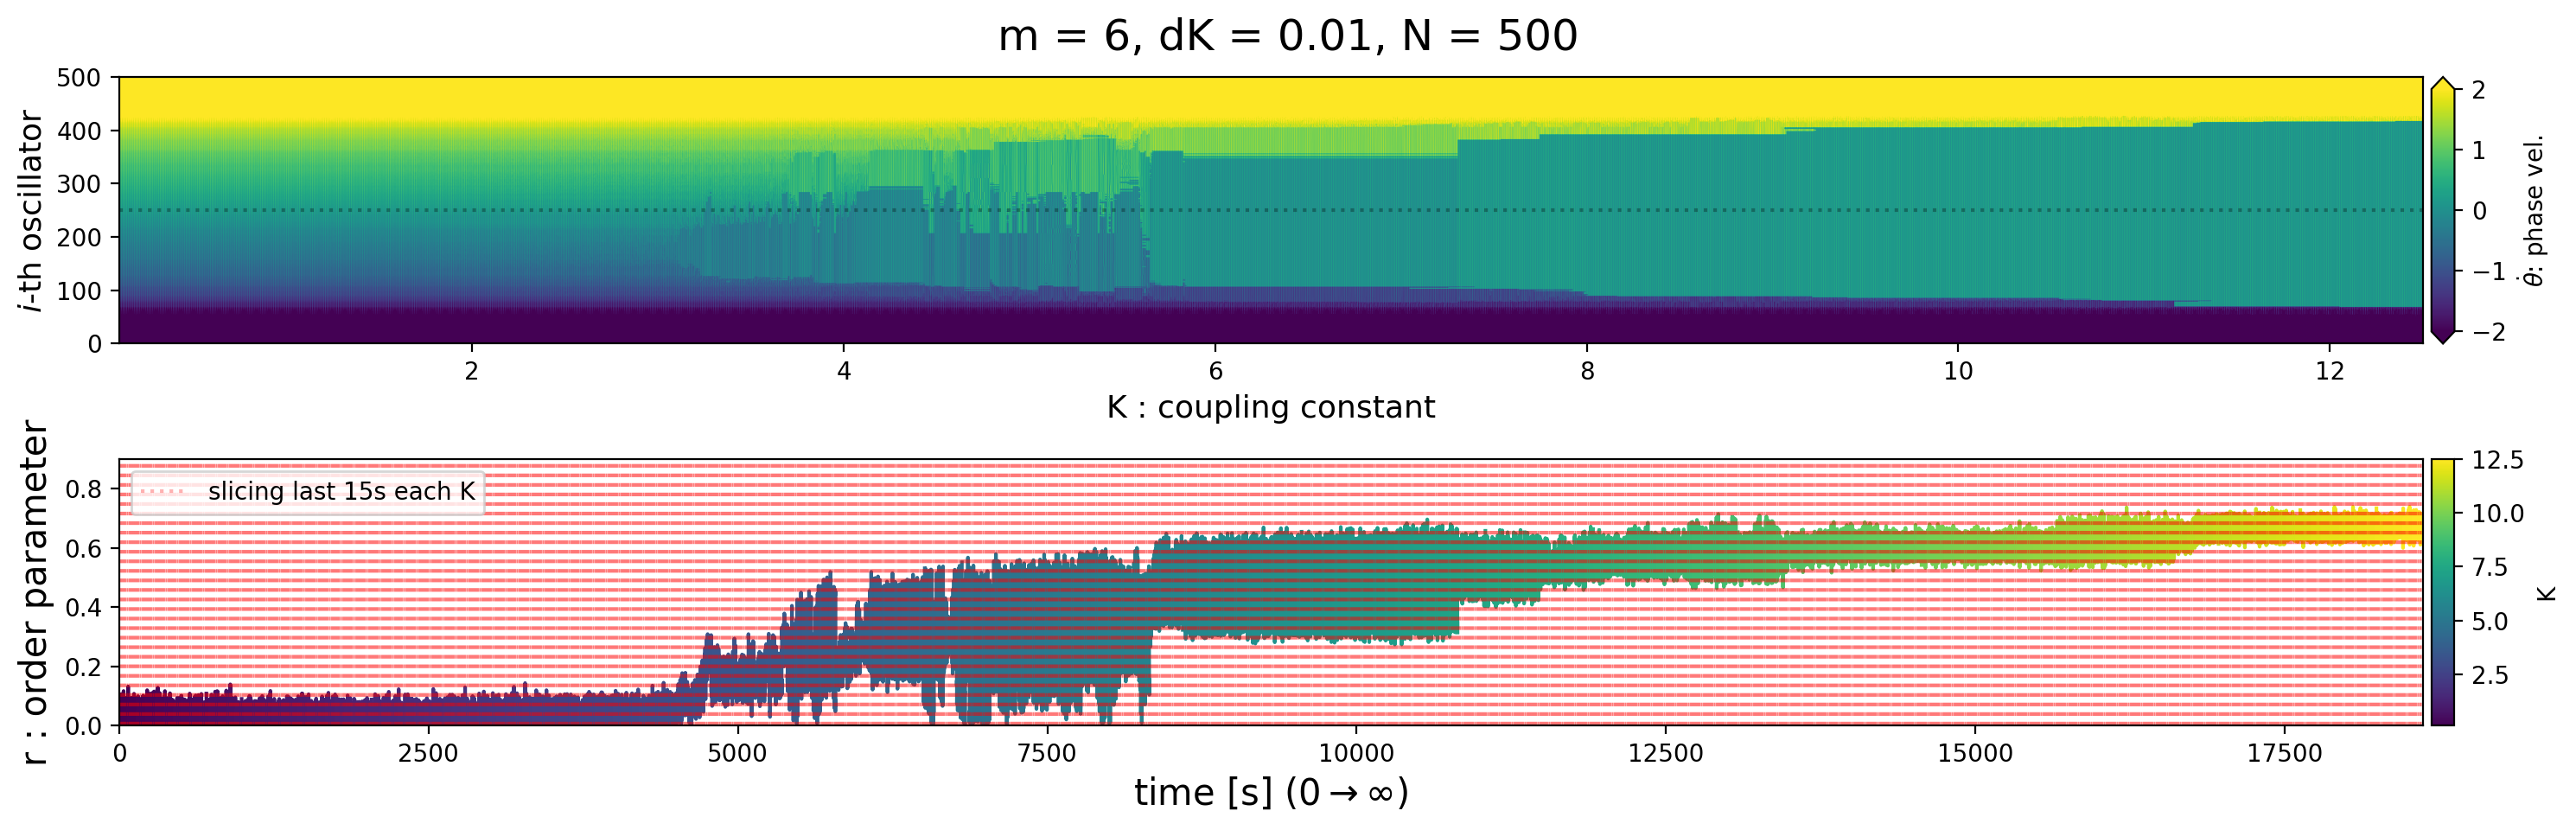

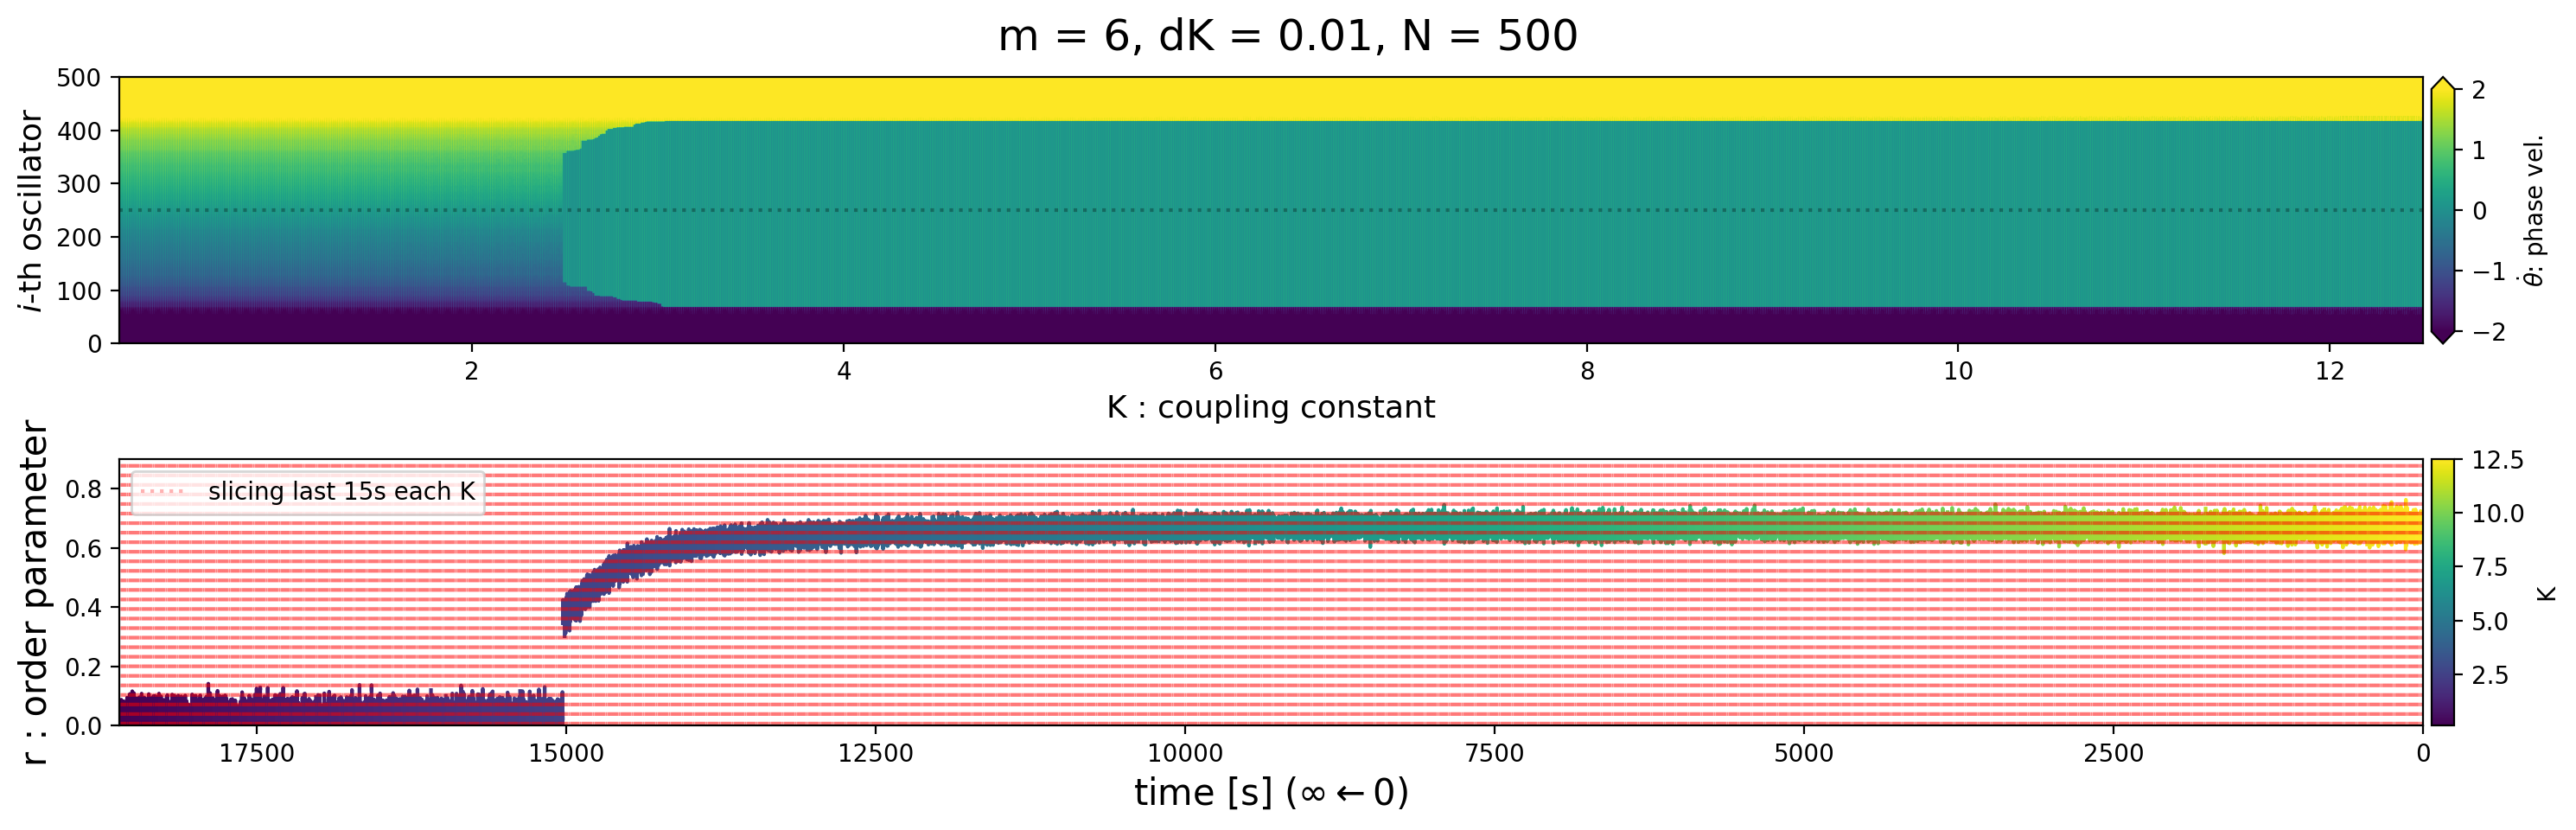

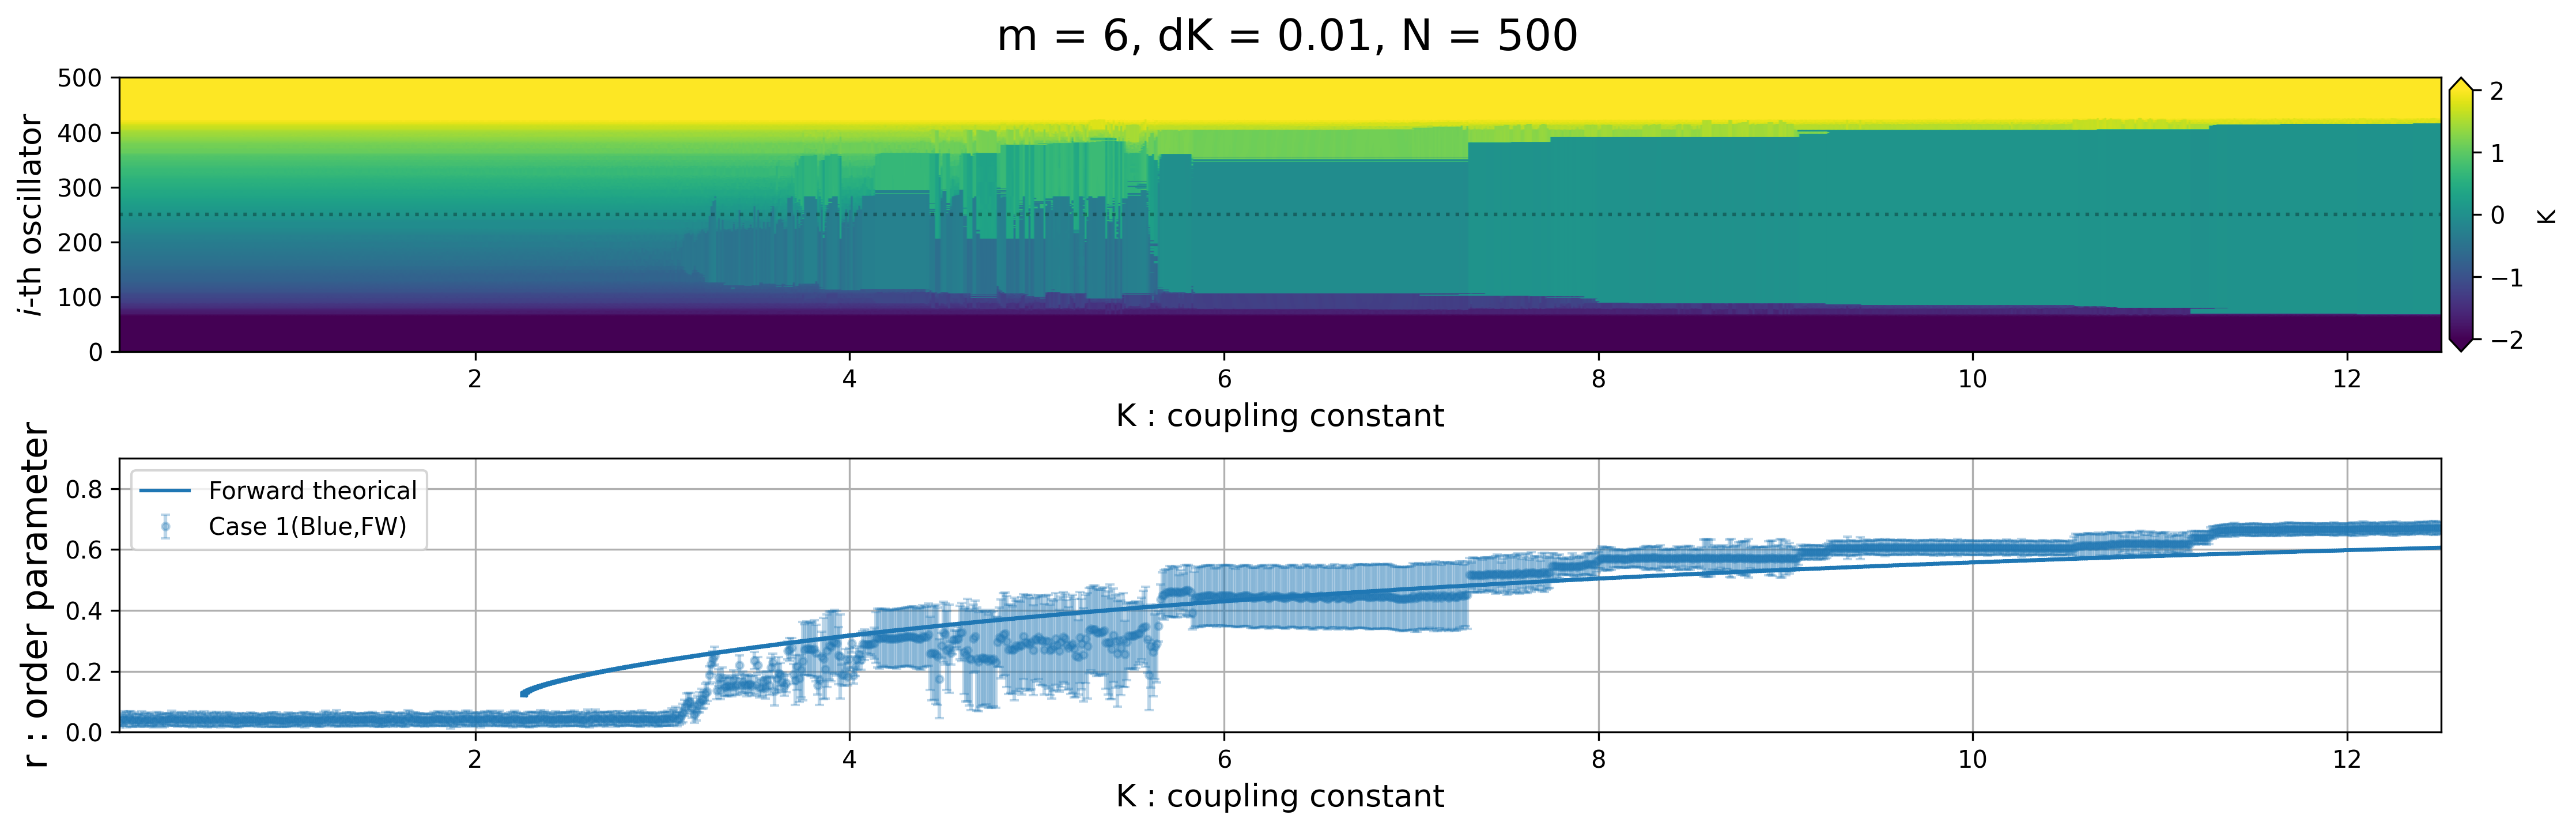

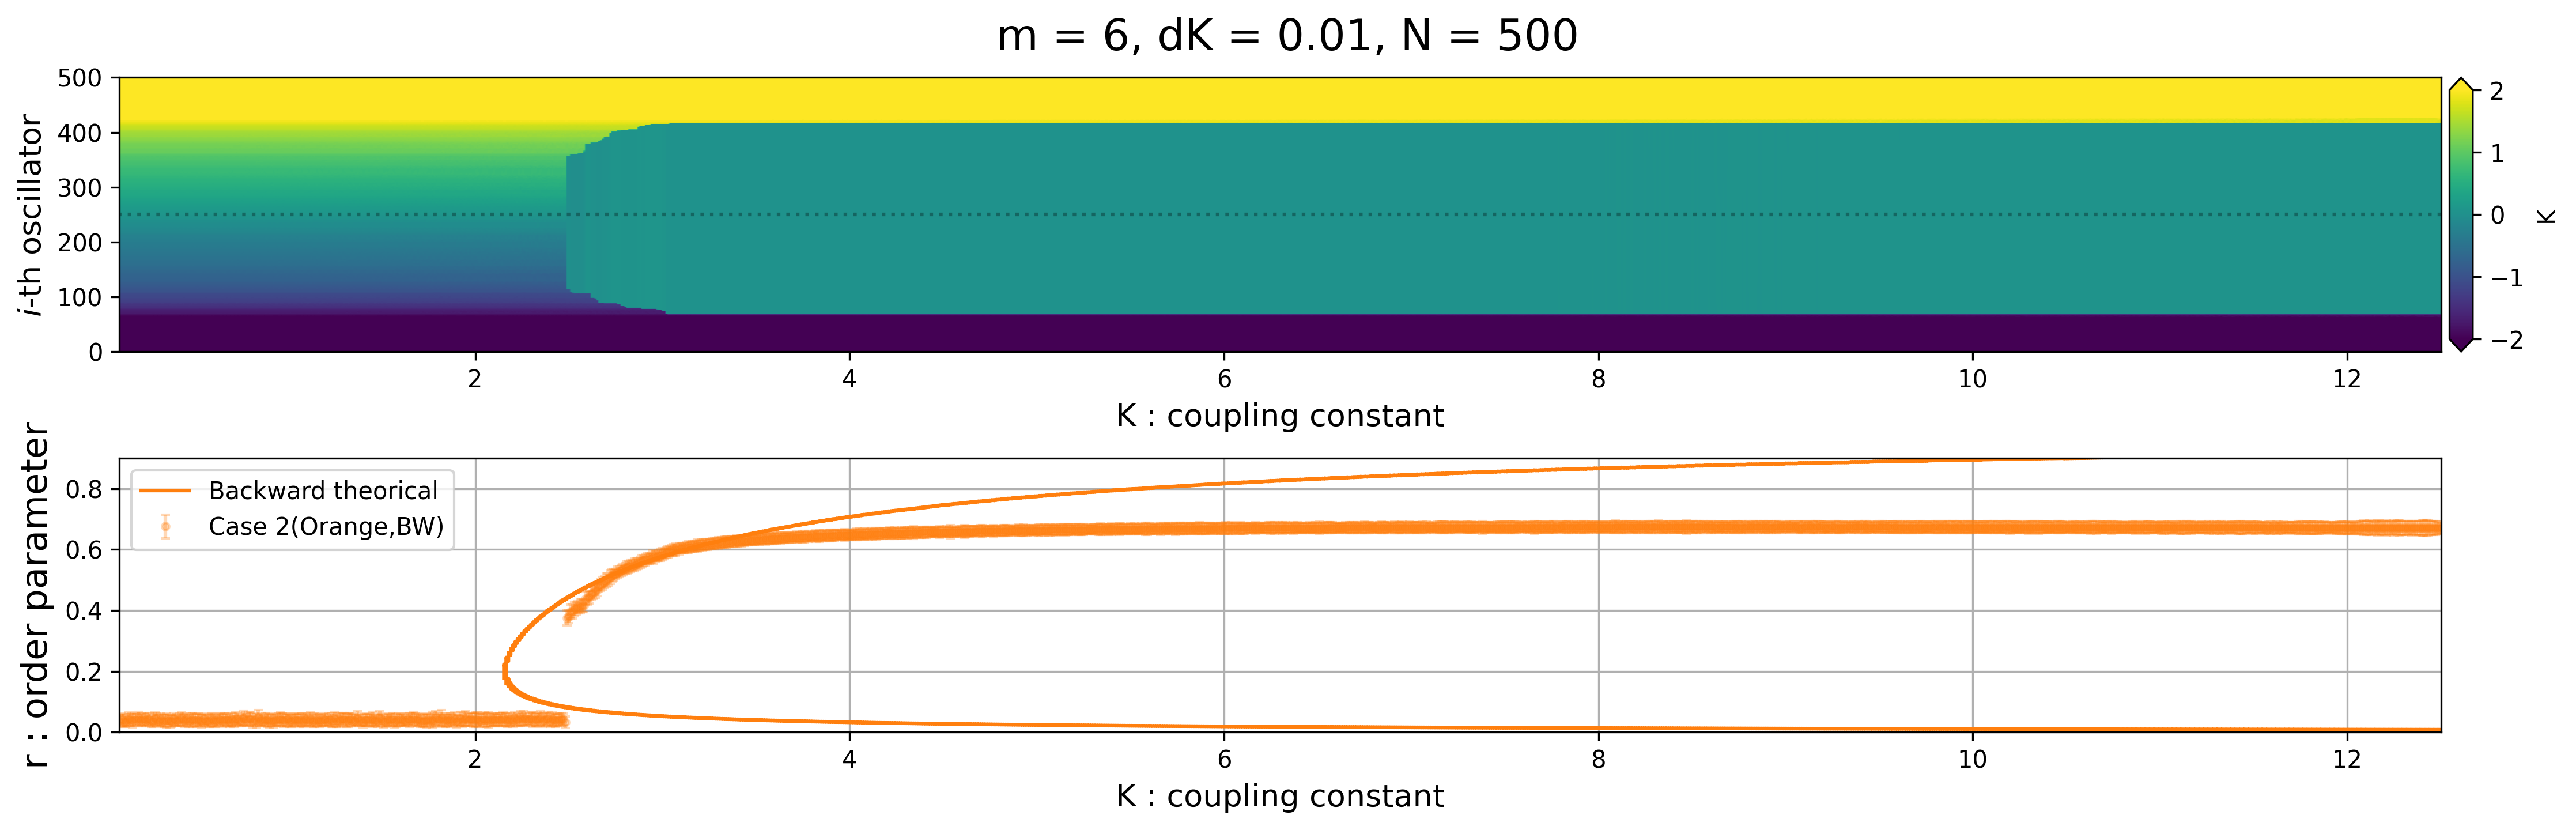

In [21]:
N = 500
dK = 0.01
dt = 0.1
ms = [6]
save = True
for m in ms:
    # df,rdf,_ = SFHy(ss,m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK)
    df,rdf = KP(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK)
    
    Draw_simple_Kr(df,rdf,m,Folder_name = DF,save=save)
    Draw_slicing_graph(df ,m,Folder_name = DF,save=save,reverse=False,dK=dK)
    Draw_slicing_graph(rdf,m,Folder_name = DF,save=save,reverse=True,dK=dK)
    Draw_mean_graph(df ,m,Folder_name = DF,save=save,reverse=False,dK=dK)
    Draw_mean_graph(rdf,m,Folder_name = DF,save=save,reverse=True,dK=dK)
    

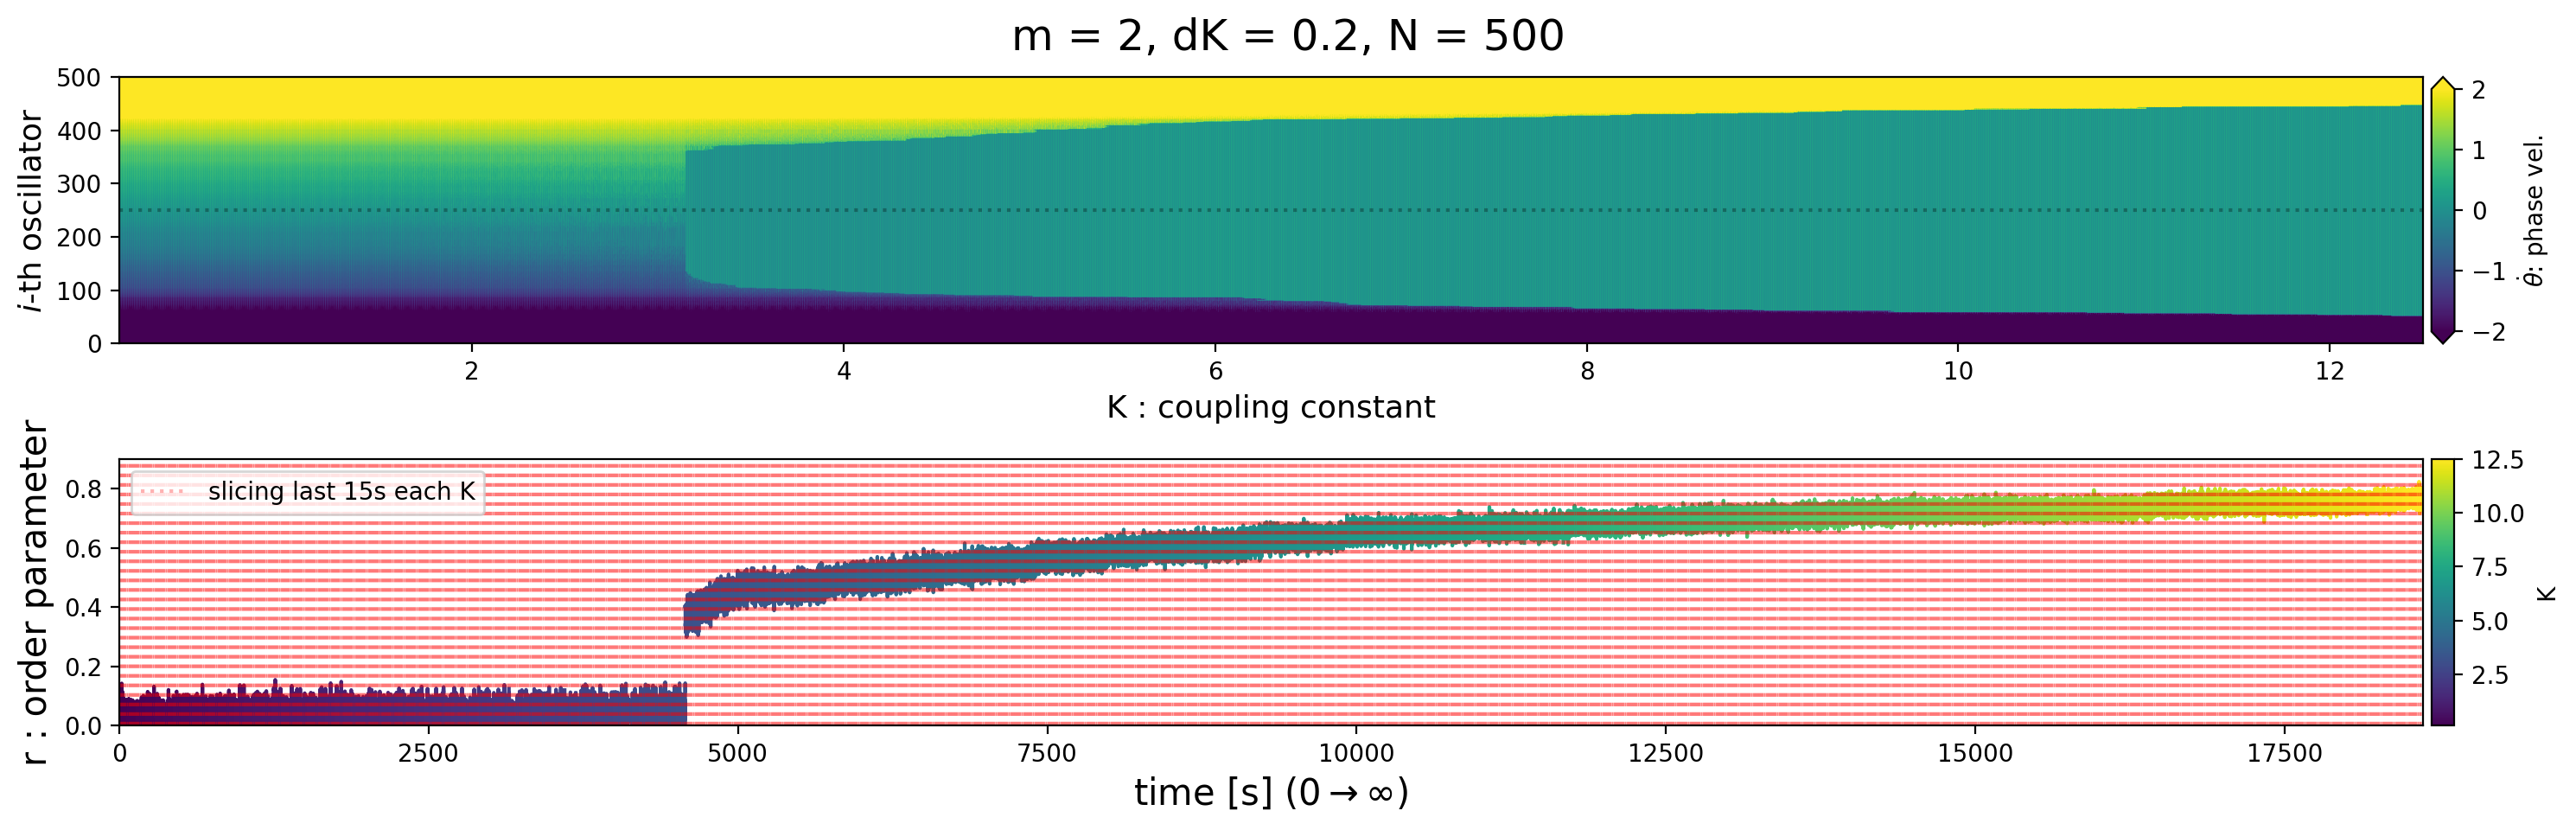

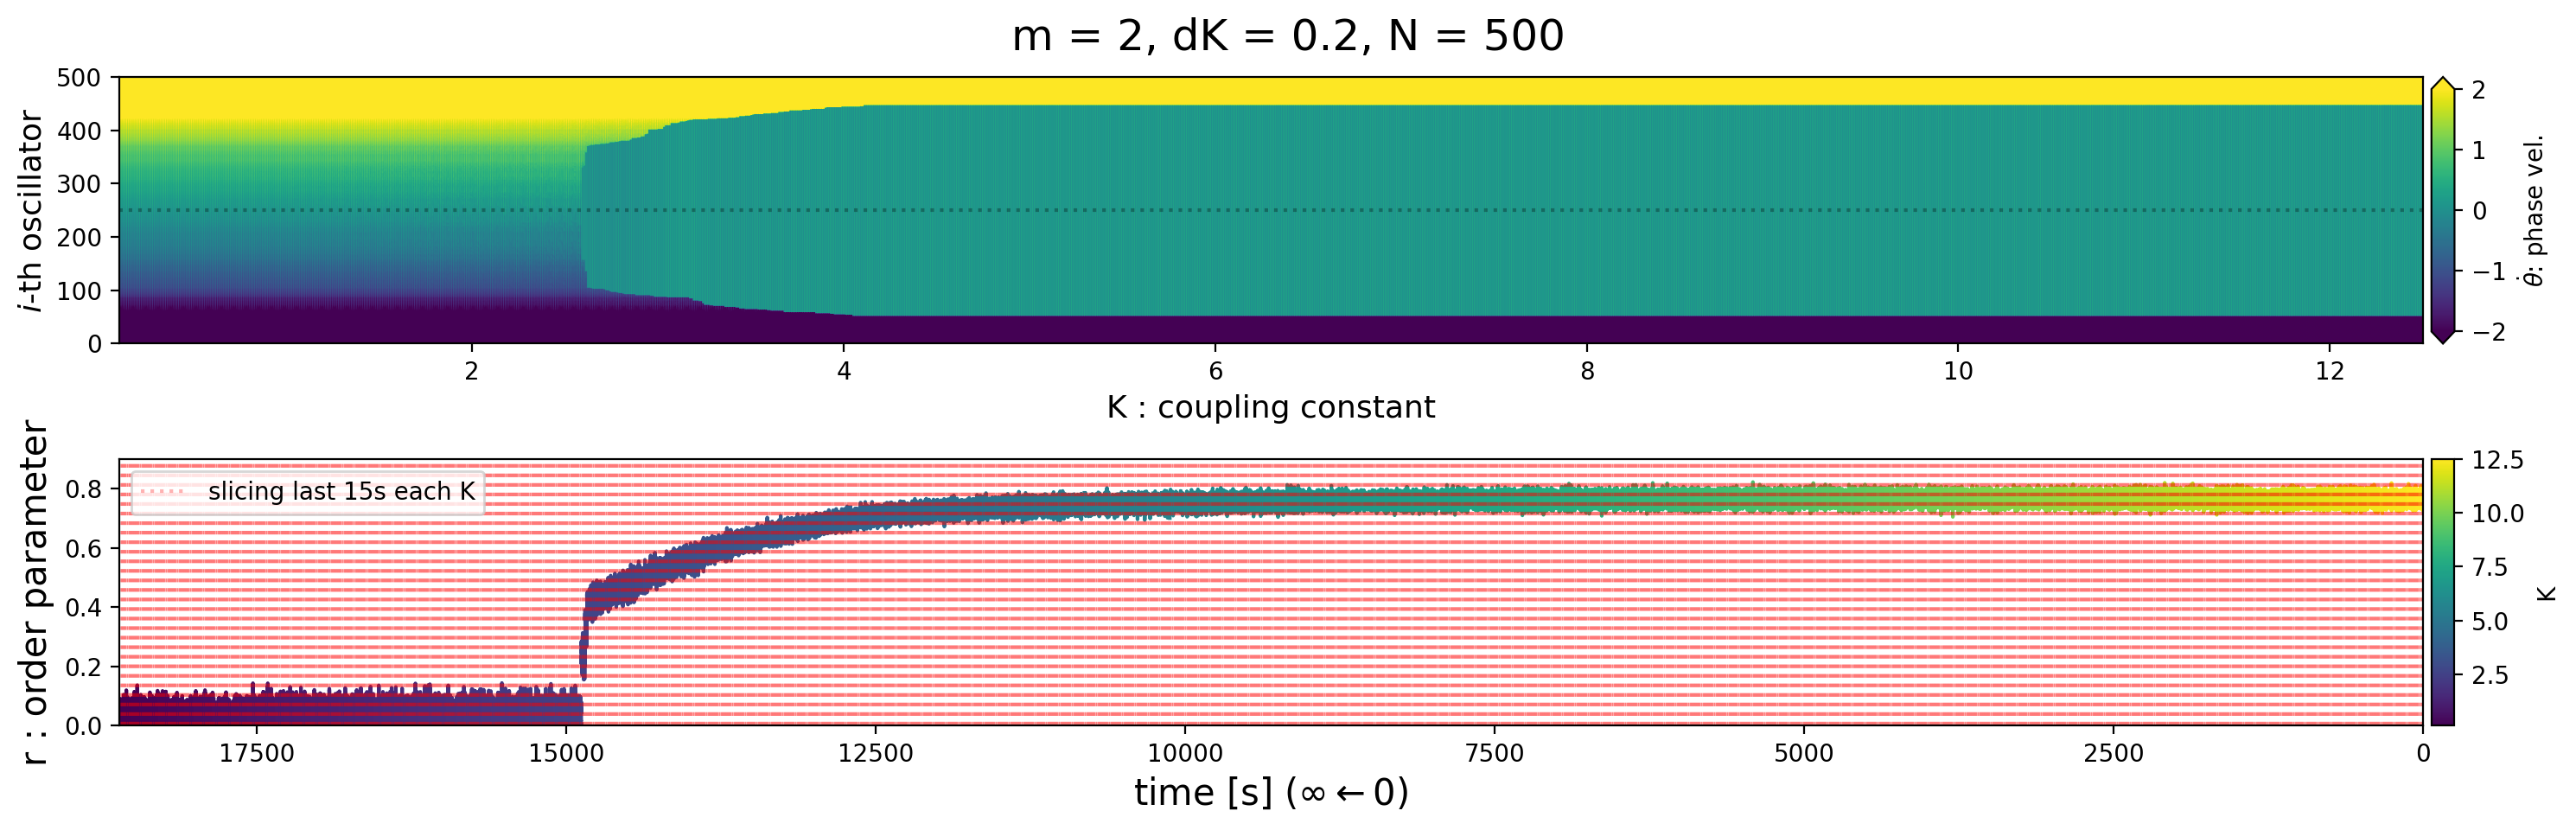

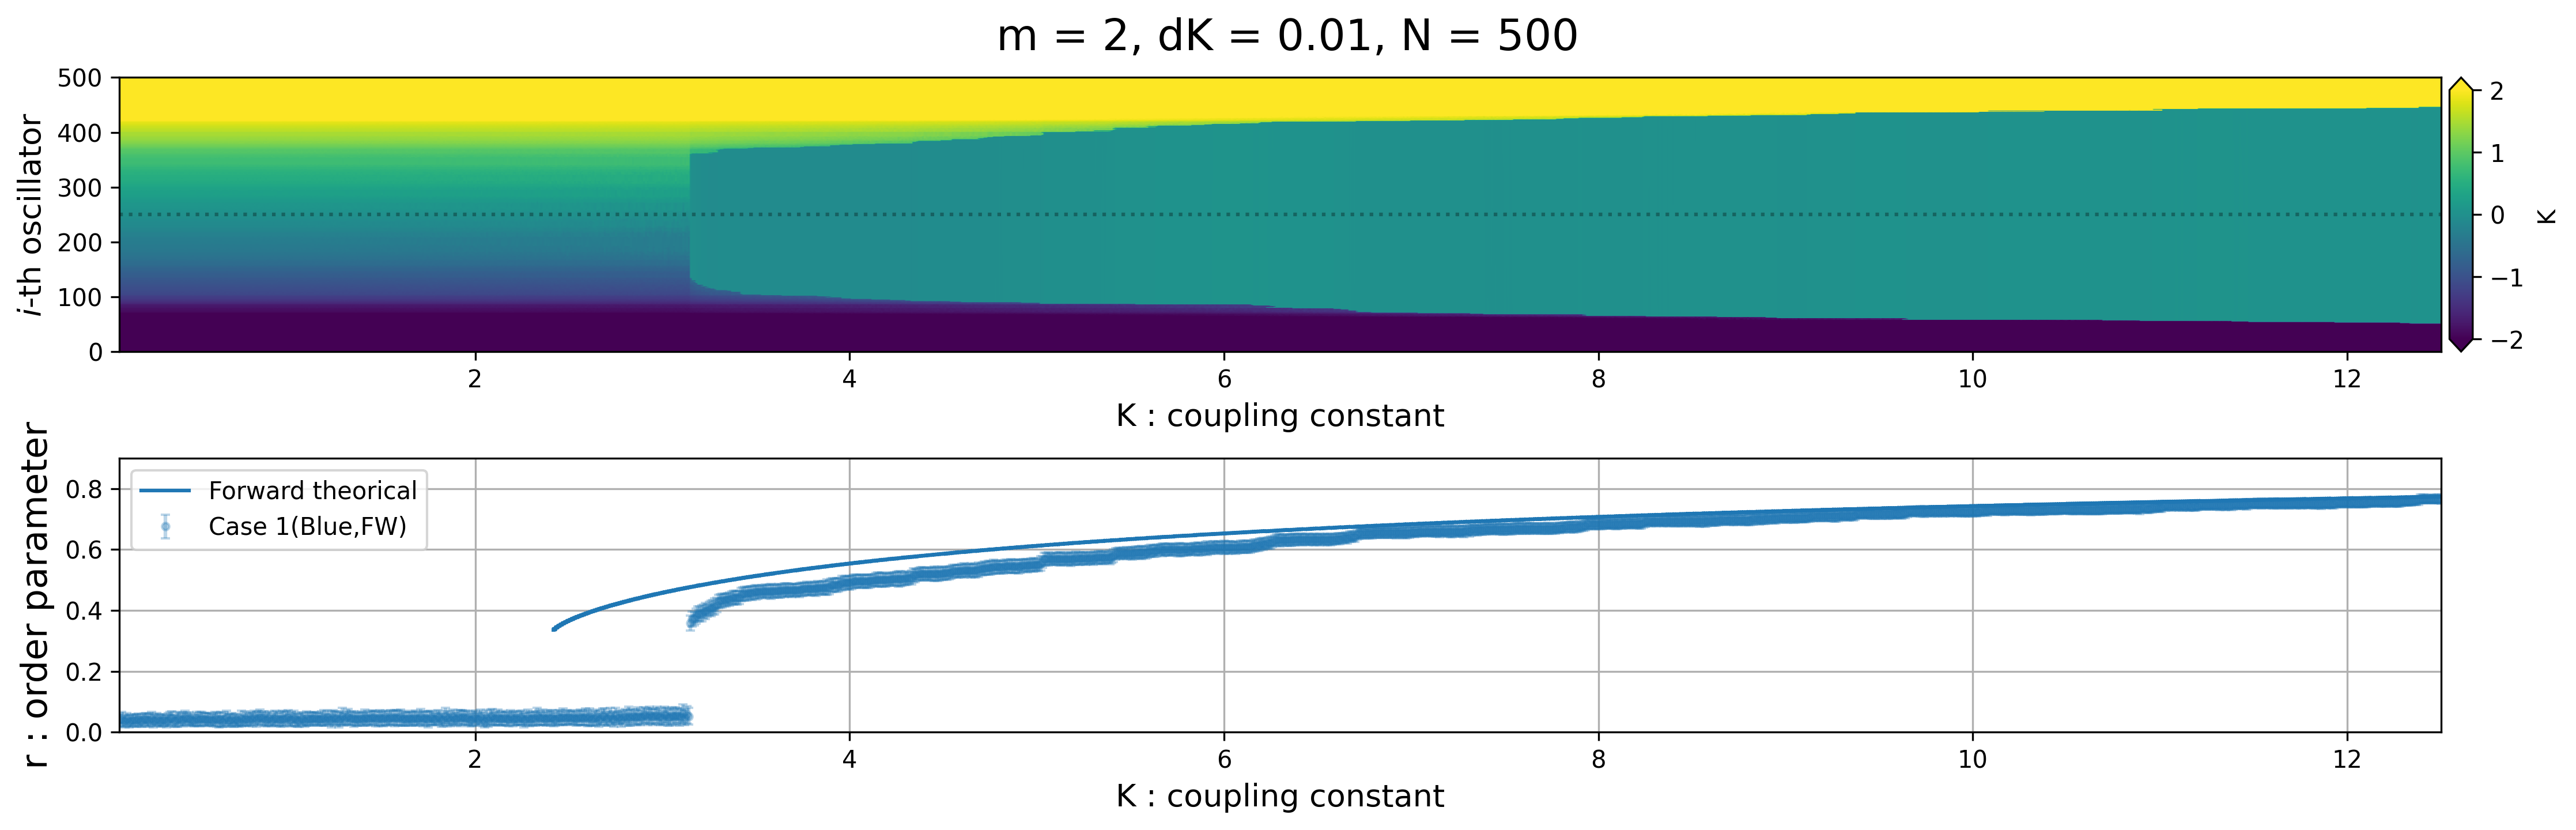

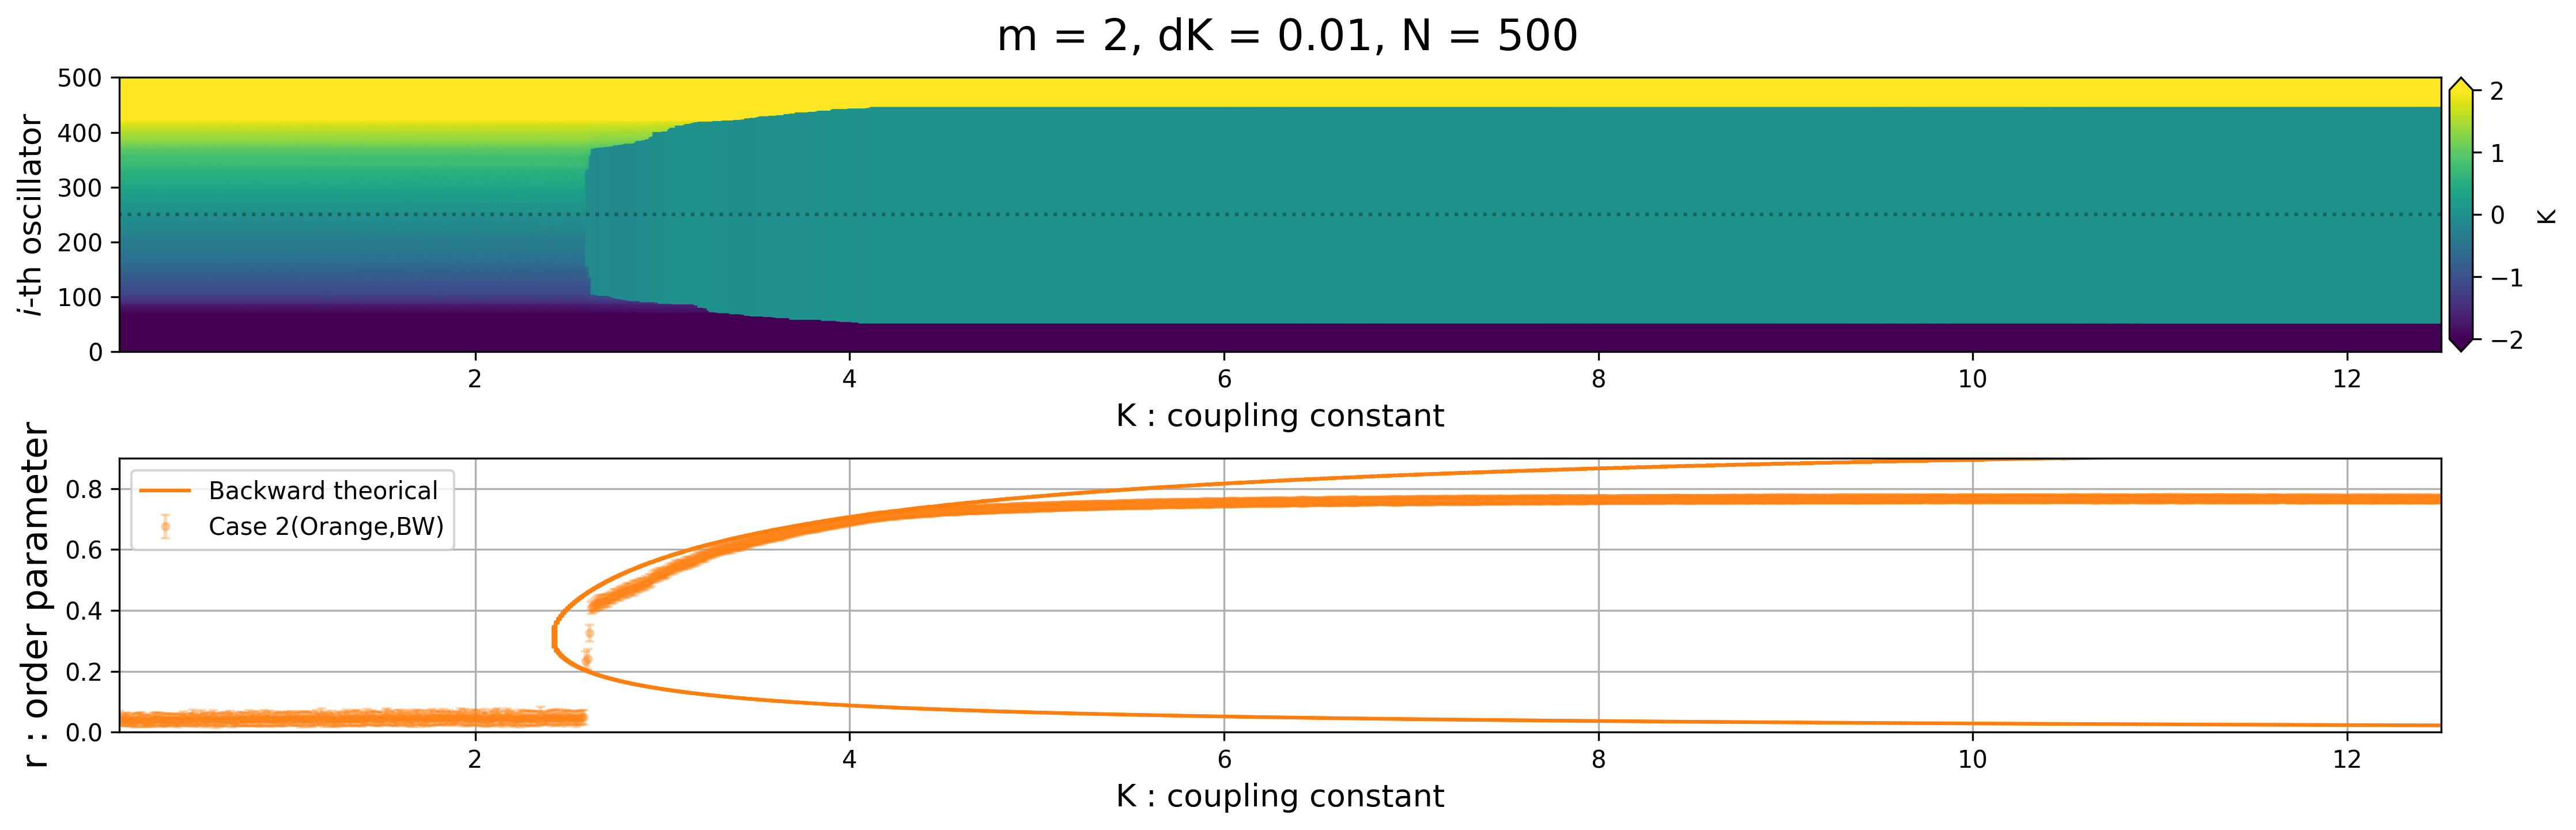

In [5]:
Draw_slicing_graph(df ,m,Folder_name = DF,save=save,reverse=False,)
Draw_slicing_graph(rdf,m,Folder_name = DF,save=save,reverse=True,)
Draw_mean_graph(df ,m,Folder_name = DF,save=save,reverse=False,dK=dK)
Draw_mean_graph(rdf,m,Folder_name = DF,save=save,reverse=True,dK=dK)
    

In [ ]:
m = 6
df,rdf,_ = SFHy(ss,m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=0.01)

  0%|          | 0/1241 [00:00<?, ?it/s]

  0%|          | 0/1241 [00:00<?, ?it/s]

In [ ]:
DF = 'Review/22.11.13/TO draw/'
Create_Folder(DF)

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:24: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


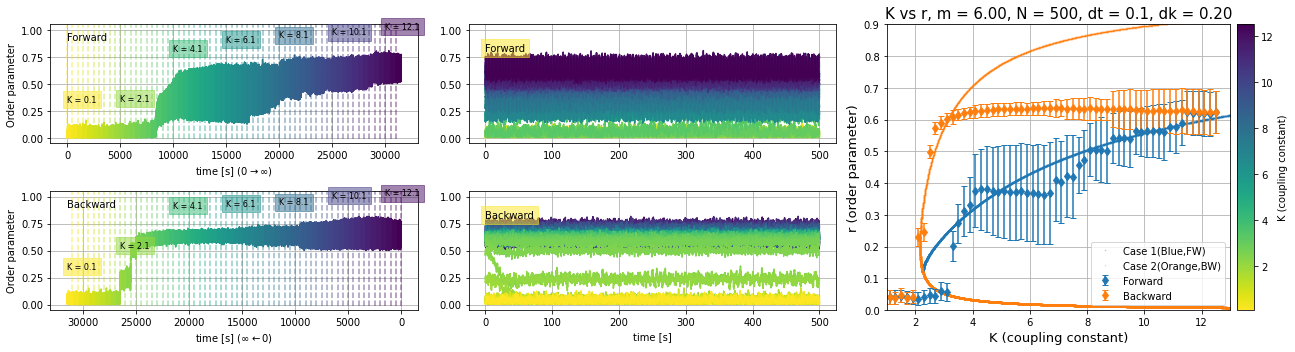

In [12]:
# df = Ksdf_095
# rdf = Ksrdf_095
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    Time_R_df_total(df,rdf,N,m,
                    save=True,Folder_name= DF
                    ,Add_name =f'TO_draw',dist=dist,mean_time=50,Draw_theoretical=True)

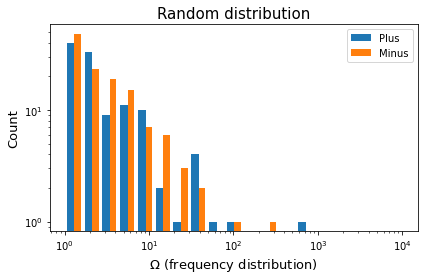

In [19]:
omega = df.Omega.iloc[0]
p_idx = np.where(omega>0)
m_idx = np.where(omega<=0)
P_o = omega[p_idx]
M_o = -omega[m_idx]
bins=np.logspace(start=np.log10(1), stop=np.log10(10_000), num=20)


# plt.figure(figsize= (4,4))
plt.hist([abs(P_o),abs(M_o)],bins=bins,label = ["Plus", "Minus"]);
plt.title("Random distribution",fontsize=15)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("$\Omega$ (frequency distribution)",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.tight_layout()

In [31]:
ST = 15
i = 15
A = df.dtheta_s.iloc[i][-ST*10:,:]
B = np.mean(A,axis=0)

ValueError: mode '(2, 0)' is not supported

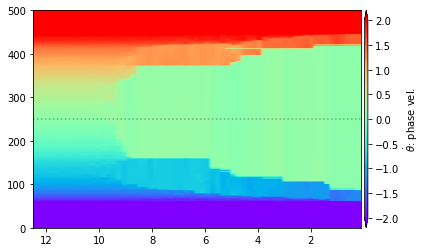

In [57]:
dt = 0.1
Ks = rdf.index
slicing = lambda x,sec:x[-int(sec/dt):]
sliced_r = df.rs.apply(slicing,sec=50)
def make_marker(x):
    Black = -20*np.ones(x.shape)
    White = +20*np.ones(x.shape)
    B = np.array([White]+[x]*100)
    return B
A =np.array([make_marker(np.mean(df.dtheta_s.iloc[i][-ST*10:,:],axis=0)) for i in range(len(Ks))])
A =np.array([(np.mean(df.dtheta_s.iloc[i][-ST*10:,:],axis=0)) for i in range(len(Ks))])
# A = np.concatenate(A,axis=0)
fig =plt.figure()
im11 =plt.imshow(A.T,extent=[Ks[0],Ks[-1],0,500],origin='lower',aspect='auto',vmin=-2.0,vmax=2.0,cmap='rainbow')
plt.hlines(250,[Ks[0]],[Ks[-1]],ls=':',color='black',alpha=0.3)



ax11 = plt.gca()
divider11 = make_axes_locatable(ax11)
cax11 = divider11.append_axes("right", size="1%", pad=0.05)
colorbar2 = fig.colorbar(im11, cax=cax11, orientation="vertical", extend="both")
colorbar2.set_label(r'$\dot{\theta}$: phase vel.')


In [13]:
def Draw_mean_K_graph(df,m,reverse=False,save=True,Folder_name =DF,dt=0.1):
    Ks = df.index
    slicing = lambda x,sec:x[-int(sec/dt):]
    sliced_r = df.rs.apply(slicing,sec=50)
    def make_marker(x):
        x[0,:]=+20
        x[1,:]=-20
        x[2,:]=+20
        return x
    ST = 15
    data = np.array([make_marker(df.dtheta_s.iloc[i][-ST*10:,:]) for i in range(len(Ks))])
    data_rs = [df.rs.iloc[i][-ST*10:] for i in range(len(Ks))]
    A = np.concatenate(data,axis=0)
    rs_total = np.concatenate(data_rs,axis=0)
    ts_total = np.arange(len(rs_total))*0.1
    ts_marker = np.arange(len(Ks))*ST
    Ks_marker = np.arange(len(Ks))*0.2 +0.1
    RS = np.split(rs_total,len(Ks))
    TS = np.split(ts_total,len(Ks))
    fig = plt.figure(figsize=(15,5),dpi=200)
    int_ =np.linspace(0.0,1,len(Ks))
    if reverse: 
        int_ = int_[::-1]
    color = plt.cm.viridis(int_)
    plt.subplot(211)
    im11 = plt.imshow(A.T,origin='lower',extent=[Ks[0],Ks[-1],0,500],vmin=-1,vmax=1,aspect='auto')
    plt.xlabel('K : coupling constant',fontsize=13)
    plt.ylabel('$i$-th oscillator',fontsize=13)
    # plt.vlines(Ks_marker,[0],[500],ls=':',color='red',alpha=0.3)
    plt.hlines(250,[Ks[0]],[Ks[-1]],ls=':',color='black',alpha=0.3)
    if reverse:
        ax = plt.gca()
        ax.invert_xaxis()


    ################# additional axes #############
    ax11 = plt.gca()
    divider11 = make_axes_locatable(ax11)
    cax11 = divider11.append_axes("right", size="1%", pad=0.05)
    colorbar2 = fig.colorbar(im11, cax=cax11, orientation="vertical", extend="both")
    colorbar2.set_label(r'$\dot{\theta}$: phase vel.')

    ############### New Graph ###################
    plt.subplot(212)
    # plt.plot(ts_total,rs_total)
    sca = plt.scatter(-1*np.ones(len(Ks)),-1*np.ones(len(Ks)),c = Ks,s=0)
    for i,(t,r) in enumerate(zip(TS,RS)):
        plt.plot(t,r,color=color[i])
    plt.ylim(0,0.9)
    plt.xlim(0,ts_total[-1])
    plt.ylabel('r : order parameter',fontsize=15)
    if reverse:
        ax = plt.gca()
        ax.invert_xaxis()
        plt.xlabel("time [s] ($\infty \leftarrow 0$)",fontsize=15)
        
    else:
        plt.xlabel(r"time [s] ($0 \rightarrow \infty$)",fontsize=15)
    plt.vlines(ts_marker,[0],[1],ls=':',color='red',alpha=0.3,label=f'slicing last {ST}s each K')
    plt.legend()
    ################# additional axes #############
    ax2 = plt.gca()
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="1%", pad=0.05)
    # cax2.axis('off')
    colorbar2 =fig.colorbar(sca, cax=cax2, orientation="vertical")
    colorbar2.set_label('K')

    plt.suptitle(f'm = {m}, dK = 0.2, N = 500',y=0.95,fontsize=18)
    plt.tight_layout()
    # plt.savefig(DF+f'm ={m} t vs r + K vs phase vel reverse.png',dpi=400)
    if save:
        if reverse:
            plt.savefig(Folder_name+f'm ={m} t vs r + K vs phase vel backward.png',dpi=400,transparent=True)
        else:
            plt.savefig(Folder_name+f'm ={m} t vs r + K vs phase vel foward.png',dpi=400,transparent=True)

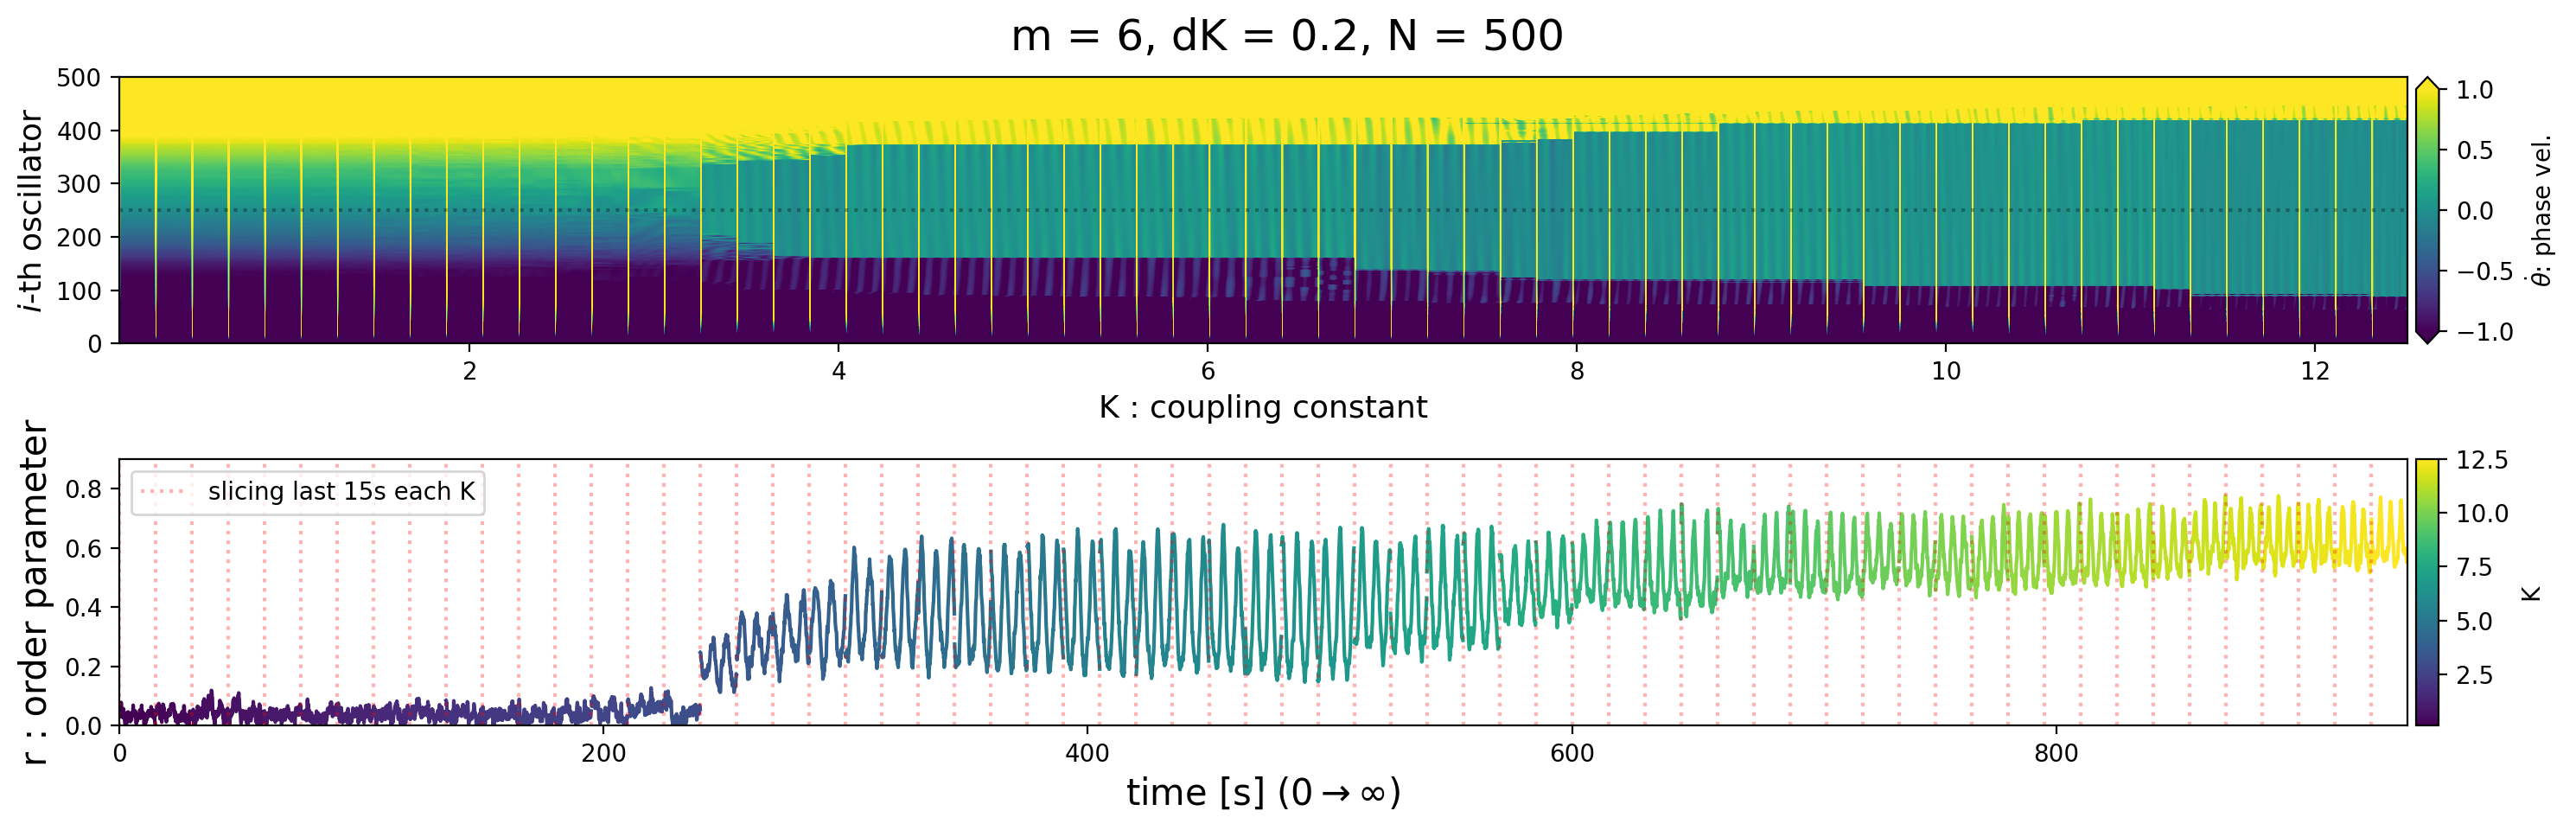

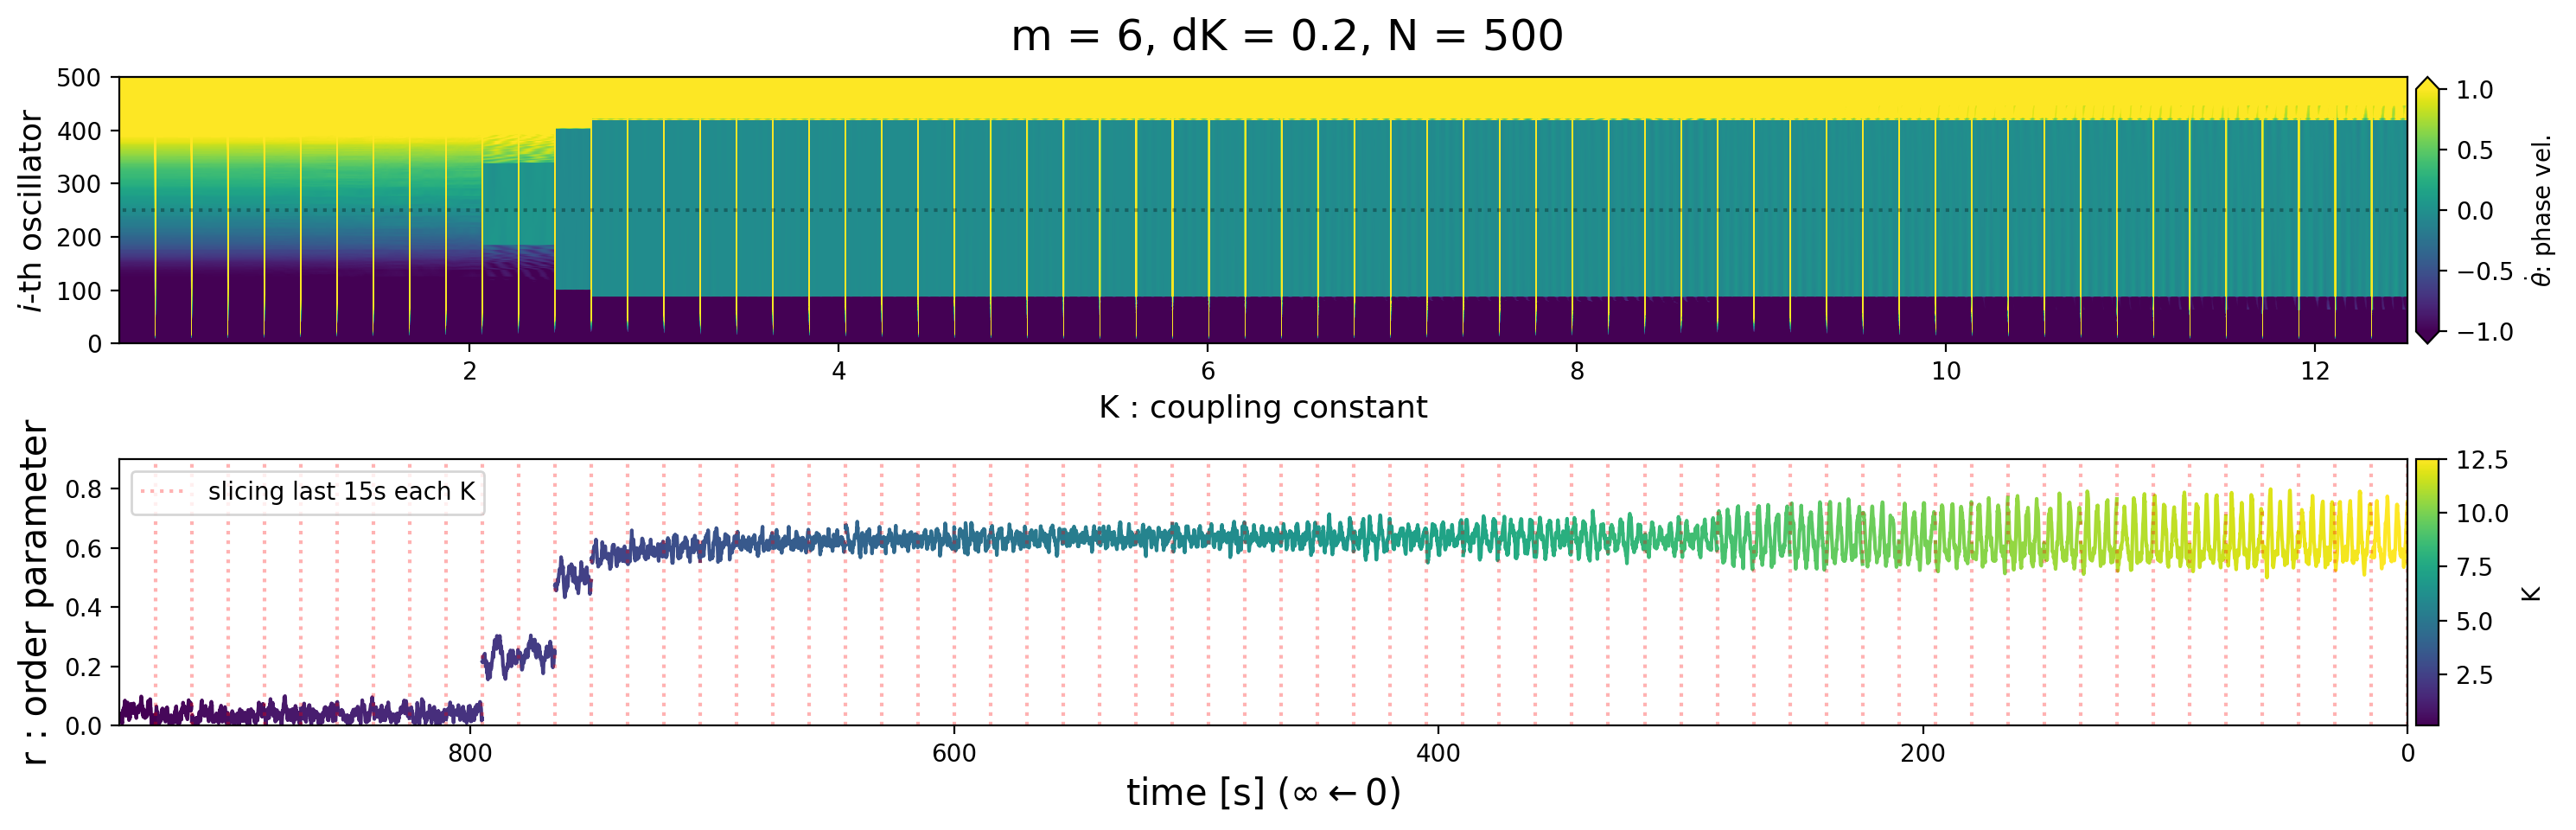

In [14]:
# df = Ksdf_095
# rdf = Ksrdf_095
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    Draw_slicing_graph(df,m,reverse=False,save=True)
    Draw_slicing_graph(rdf,m,reverse=True,save=True)